https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer?resource=download

In [1]:
data_set = read.csv('survey lung cancer.csv')

In [11]:
install.packages("psych")

also installing the dependencies 'tmvnsim', 'mnormt'




  There is a binary version available but the source version is later:
      binary source needs_compilation
psych  2.1.3  2.2.3             FALSE

package 'tmvnsim' successfully unpacked and MD5 sums checked
package 'mnormt' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mazur\AppData\Local\Temp\RtmpiiEJWe\downloaded_packages


installing the source package 'psych'



In [2]:
library("psych")
library(repr)

In [13]:
data_set

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN,LUNG_CANCER
M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [75]:
data_set <- subset(data_set, LUNG_CANCER == "YES")
summary(data_set)

 GENDER       AGE           SMOKING      YELLOW_FINGERS     ANXIETY     
 F:125   Min.   :38.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 M:145   1st Qu.:58.00   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
         Median :62.50   Median :2.000   Median :2.000   Median :2.000  
         Mean   :62.95   Mean   :1.574   Mean   :1.604   Mean   :1.526  
         3rd Qu.:69.00   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
         Max.   :81.00   Max.   :2.000   Max.   :2.000   Max.   :2.000  
 PEER_PRESSURE   CHRONIC.DISEASE    FATIGUE       ALLERGY         WHEEZING    
 Min.   :1.000   Min.   :1.000   Min.   :1.0   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.0   1st Qu.:1.000   1st Qu.:1.000  
 Median :2.000   Median :2.000   Median :2.0   Median :2.000   Median :2.000  
 Mean   :1.537   Mean   :1.526   Mean   :1.7   Mean   :1.619   Mean   :1.604  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.0   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :2.000 

**Średnia arytmetyczna**

In [16]:
tapply(data_set$AGE, data_set$GENDER, mean)

F        M 
62.78400 63.09655

In [17]:
mean(data_set$AGE)

[1] 62.95185

**Średnia harmoniczna**

In [18]:
tapply(data_set$AGE, data_set$GENDER, harmonic.mean)

F        M 
61.58303 62.17388

In [19]:
harmonic.mean(data_set$AGE)

[1] 61.89894

**Średnia geometryczna**

In [20]:
tapply(data_set$AGE, data_set$GENDER, geometric.mean)

F        M 
62.19205 62.64459

In [21]:
geometric.mean(data_set$AGE)

[1] 62.43468

**Średnia ucinana**

In [22]:
su <- function(X, k=50) {
  P <- sort(X)
  return(1 / (length(P) - 2 * k) * sum(P[(k + 1):(length(P) - k)]))
}

In [23]:
tapply(data_set$AGE, data_set$GENDER, su)

F        M 
62.12000 62.82222

In [24]:
su(data_set$AGE)

[1] 62.88235

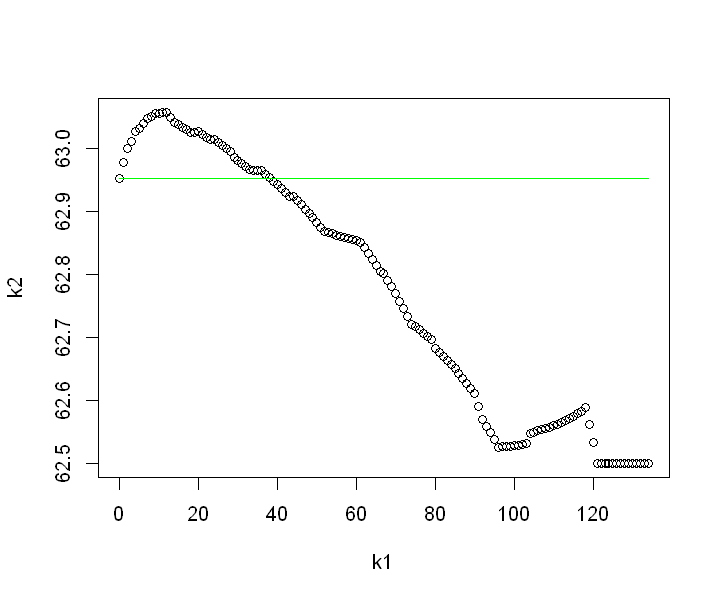

In [25]:
k1 <- seq(0, length(data_set$AGE) / 2 - 1, 1)
k2 <- numeric()
for(t in 1:length(k1)) {
  k2[t] <- su(data_set$AGE, k1[t])
}
options(repr.plot.width = 6, repr.plot.height = 5)
plot(k1, k2)
lines(k1, rep(mean(data_set$AGE), length(k1)), col = "green")

**Średnia windsorowska**

In [26]:
sw <- function(X, k=50) {
  P <- sort(X)
  return(1 / length(P) * ((k + 1) * P[k + 1] + sum(P[(k + 2):(length(P) - k - 1)]) + (k + 1) * P[length(P) - k]))
}

In [27]:
tapply(data_set$AGE, data_set$GENDER, sw)

F        M 
62.42400 62.94483

In [28]:
sw(data_set$AGE)

[1] 63.11111

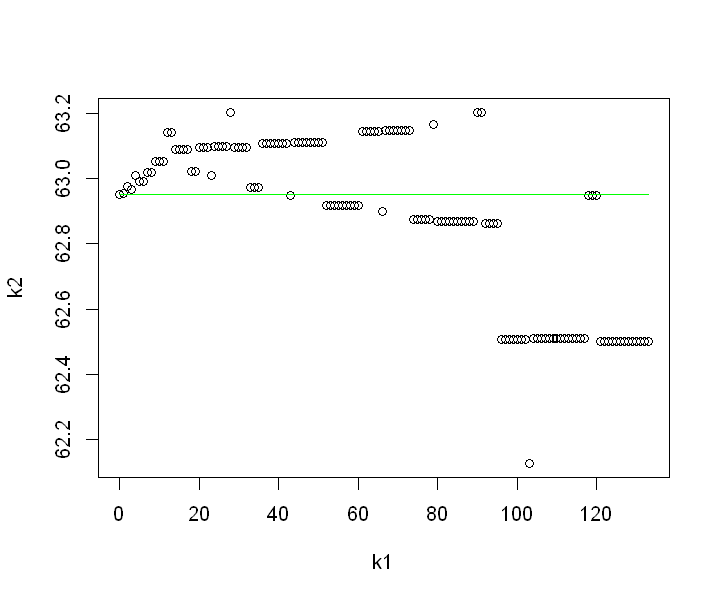

In [29]:
k1 <- seq(0, length(data_set$AGE) / 2 - 2, 1)
k2 <- numeric()
for(t in 1:length(k1)) {
  k2[t] <- sw(data_set$AGE, k1[t])
}
plot(k1, k2)
lines(k1, rep(mean(data_set$AGE), length(k1)), col = "green")

**Mediana**

In [30]:
tapply(data_set$AGE, data_set$GENDER, median)

F  M 
62 63

In [31]:
median(data_set$AGE)

[1] 62.5

**Histogram**

In [76]:
jpeg("hist_base.jpg", width = 600, height = 500)
hist(data_set$AGE,
    breaks = seq(min(data_set$AGE), max(data_set$AGE),
    length.out = round(5 * log(length(data_set$AGE)))),
    col = "lightpink", xlab = "WIEK", ylab = "",
    main = "Histogram liczebności")
dev.off()

png 
  2

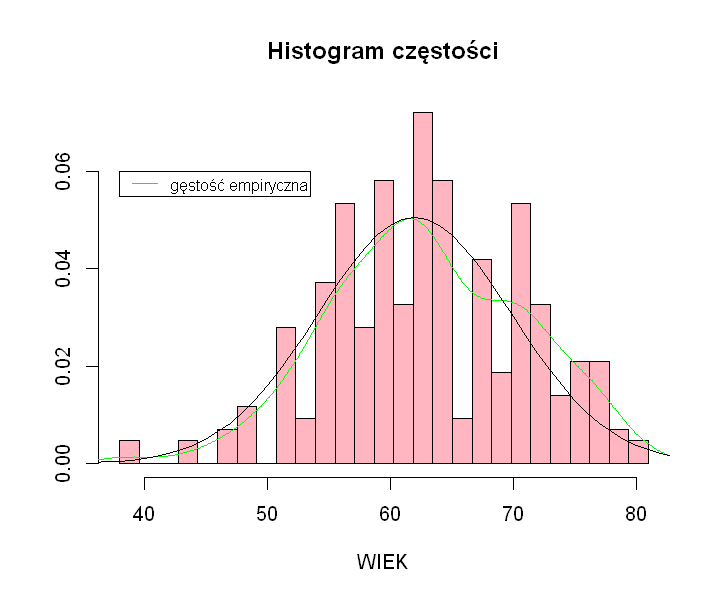

In [159]:
#jpeg("hist_base_den.jpg", width = 600, height = 500)
hist(data_set$AGE,
    breaks = seq(min(data_set$AGE), max(data_set$AGE),
    length.out = round(5 * log(length(data_set$AGE)))),
    col = "lightpink", freq = FALSE, xlab = "WIEK", ylab = "",
    main = "Histogram częstości")
f <- density(data_set$AGE)
lines(f$x, f$y, col = "green")
legend(38, 0.06, legend = "gęstość empiryczna", col = "green", lty = 1,
    cex = 0.8)
lines(x, dnorm(x, mean=62, sd=7.9))
#dev.off()

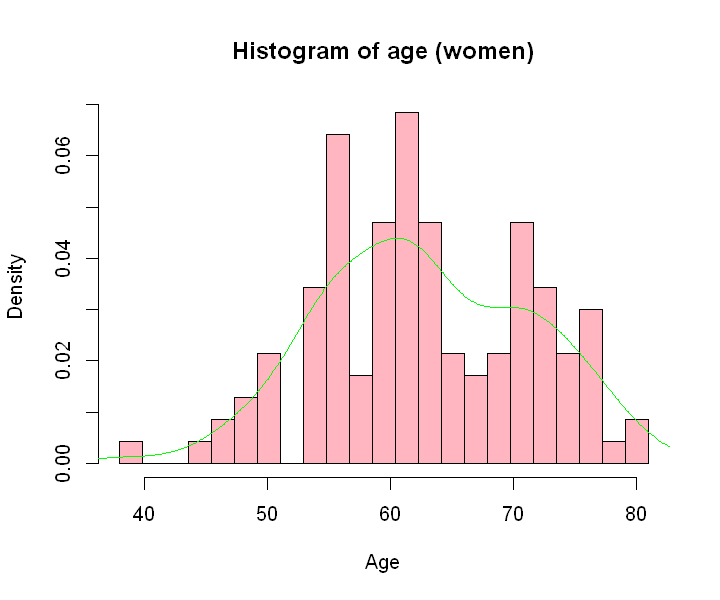

In [136]:
women <- subset(data_set, GENDER == "F")
hist(women$AGE,
    breaks = seq(min(women$AGE), max(women$AGE),
    length.out = round(5 * log(length(women$AGE)))),
    col = "lightpink", freq = FALSE, xlab = "Age",
    main = "Histogram of age (women)")
f <- density(women$AGE)
lines(f$x, f$y, col = "green")
legend(20, 0.06, legend = "density", col = "green", lty = 1, cex = 0.8)

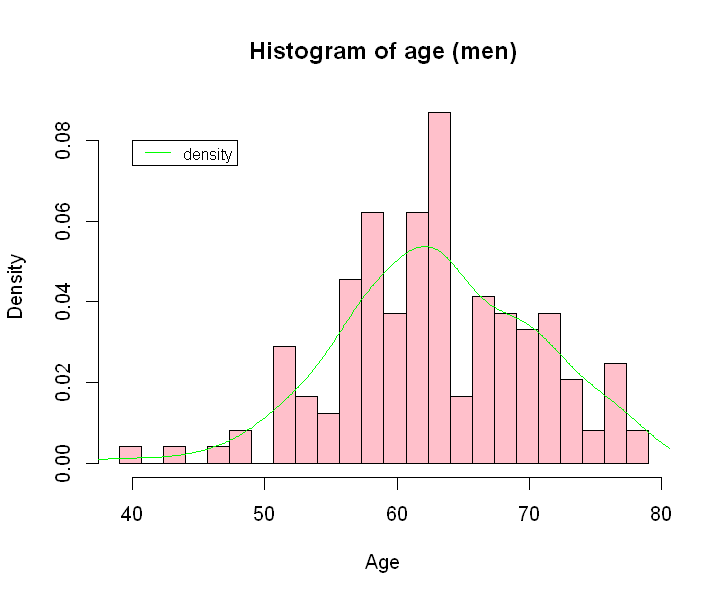

In [137]:
men <- subset(data_set, GENDER == "M")
hist(men$AGE, breaks = seq(min(men$AGE), max(men$AGE),
    length.out = round(5 * log(length(men$AGE)))),
    col = "pink", freq = FALSE, xlab = "Age", main = "Histogram of age (men)")
f <- density(men$AGE)
lines(f$x, f$y, col = "green")
legend(40, 0.08, legend = "density", col = "green", lty = 1, cex = 0.8)

Boxplot

In [138]:
jpeg("boxplot_base.jpg", width = 600, height = 500)
options(repr.plot.width = 6, repr.plot.height = 5)
boxplot(data_set$AGE, col = "aquamarine", border = "violetred4",
    main = "Wiek chorych")
dev.off()

png 
  2

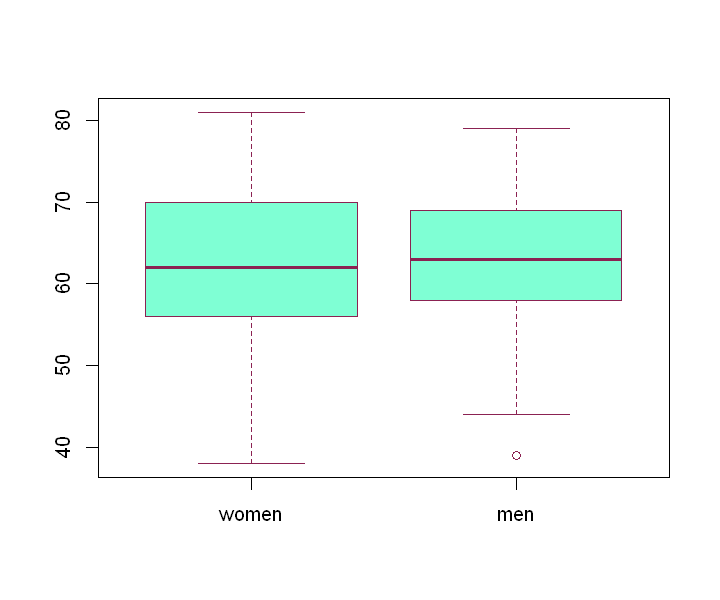

In [139]:
boxplot(women$AGE, men$AGE, col = "aquamarine",
    border = "violetred4", names = c("women", "men"))
k <- seq(0, 5, 0.1)
#lines(k, rep(mean(data_set$AGE), length(k)))

In [44]:
sm_women <- subset(women, SMOKING > 1)
non_sm_women <- subset(women, SMOKING < 2)
sm_men <- subset(men, SMOKING > 1)
non_sm_men <- subset(men, SMOKING < 2)

In [45]:
jpeg("boxplot_gender_smoking.jpg", width = 600, height = 800)
options(repr.plot.width = 6, repr.plot.height = 10)
boxplot(sm_women$AGE, sm_men$AGE, non_sm_women$AGE, non_sm_men$AGE,
    horizontal = TRUE, col = "aquamarine", border = "violetred4",
    names=c("smoking women", "smoking men",
        "not smoking women", "not smoking men"))
dev.off()

png 
  2

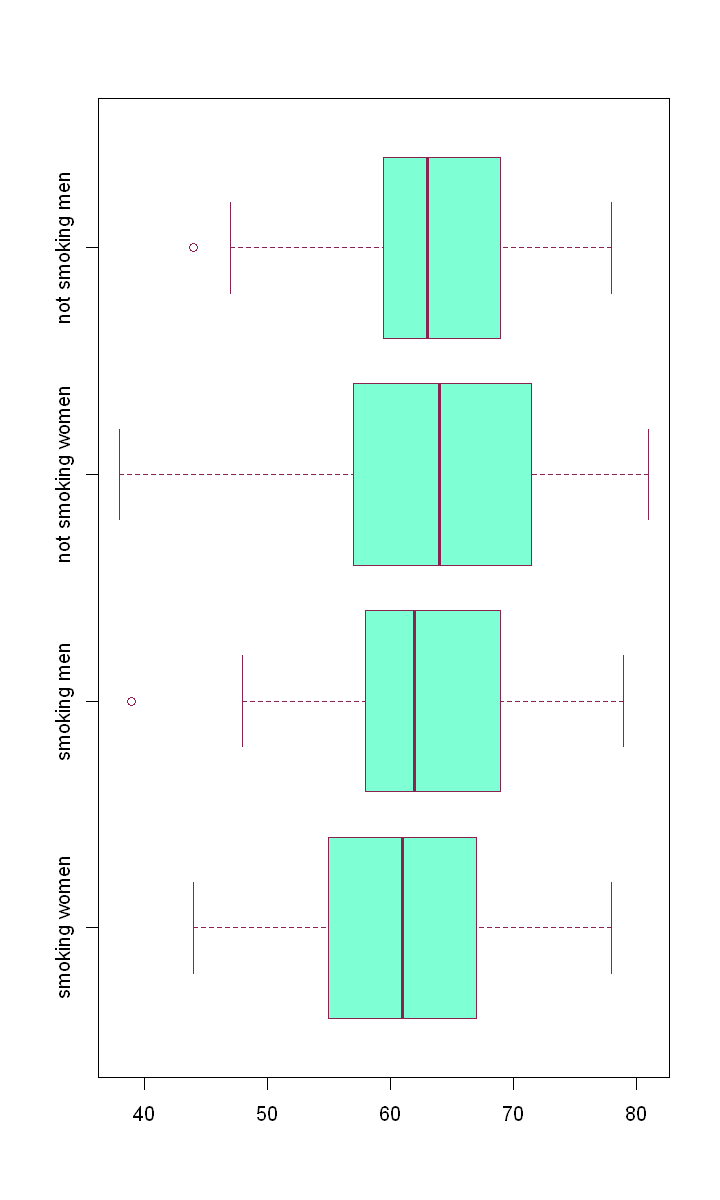

In [46]:
options(repr.plot.width = 6, repr.plot.height = 10)
boxplot(sm_women$AGE, sm_men$AGE, non_sm_women$AGE, non_sm_men$AGE,
    horizontal = TRUE, col = "aquamarine", border = "violetred4",
    names=c("smoking women", "smoking men",
        "not smoking women", "not smoking men"))

Dystrybuanta empiryczna

In [170]:
options(repr.plot.width = 6, repr.plot.height = 5)
F <- ecdf(data_set$AGE)
px <- seq(35, 85)
jpeg("dystr_norm.jpg", width = 600, height = 500)
plot(x, F(x), ylab = "F(x)", col = "purple",
    main = "Dystrybuanta empiryczna")
#fit1 <- lm(F(x)~x)
#second degree
#fit2 <- lm(F(x)~poly(x,2,raw=TRUE))
#third degree
#fit3 <- lm(F(x)~poly(x,3,raw=TRUE))
#fourth degree
#fit4 <- lm(F(x)~poly(x,4,raw=TRUE))
#lines(px, predict(fit1, data.frame(x=px)), col="red")
#lines(px, predict(fit2, data.frame(x=px)), col="green")
#lines(px, predict(fit3, data.frame(x=px)), col="blue")
#lines(px, predict(fit4, data.frame(x=px)), col="purple")
lines(x, pnorm(x, mean=62.95, sd=7.97), col = "red")
legend(35, 1, legend = "dystrybuanta N(62.95, 9.97)", col = "red", lty = 1,
    cex = 0.8)
dev.off()

png 
  2

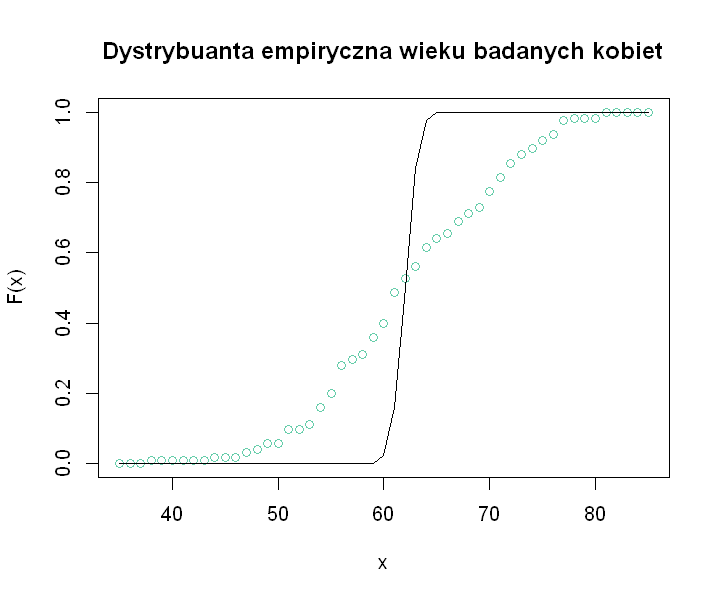

In [152]:
F1 <- ecdf(women$AGE)
plot(x, F1(x), col = "aquamarine3", ylab = "F(x)",
    main = "Dystrybuanta empiryczna wieku badanych kobiet")
lines(x, pnorm(x, mean=62))

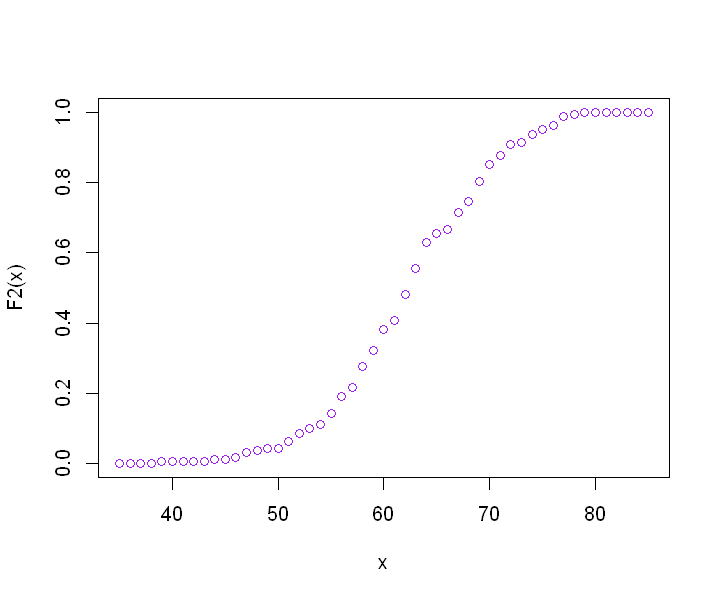

In [27]:
F2 <- ecdf(men$AGE)
plot(x, F2(x), col = "purple")

In [82]:
tapply(data_set$AGE, data_set$SMOKING, mean)
table(data_set$SMOKING)

1        2 
63.77391 62.34194


  1   2 
115 155 

In [78]:
smoke <- subset(data_set, SMOKING > 1)
non_smoke <- subset(data_set, SMOKING < 2)
jpeg("boxplot_smoking.jpg", width = 600, height = 600)
options(repr.plot.width = 7, repr.plot.height = 5)
boxplot(smoke$AGE, non_smoke$AGE, horizontal = TRUE, col = "aquamarine",
    border = "violetred4", names = c("PALĄCY", "NIEPALĄCY"))
dev.off()

png 
  2

In [120]:
c1 <- rgb(204, 0, 86, max = 255, names = "lt.red")
c2 <- rgb(173, 150, 214, max = 255, names = "lt.green")
jpeg("hist_smoking.jpg", width = 800, height = 600)
h1 <- hist(smoke$AGE, breaks = seq(min(smoke$AGE), max(smoke$AGE),
    length.out = round(5 * log(length(smoke$AGE)))), plot = FALSE)
h2 <- hist(non_smoke$AGE, breaks = seq(min(non_smoke$AGE), max(non_smoke$AGE),
    length.out = round(5 * log(length(non_smoke$AGE)))), plot = FALSE)

plot(h1, col = c1, main = "Histogram wieku palących i niepalących",
    xlab = "WIEK", ylab = "")
plot(h2, col = c2, add = TRUE)
legend(38, 20, legend = c("palący", "niepalący"),
    col = c(c1, c2), lwd = 3, cex = 1.2)
dev.off()

png 
  2

[1] 40

[1] 90

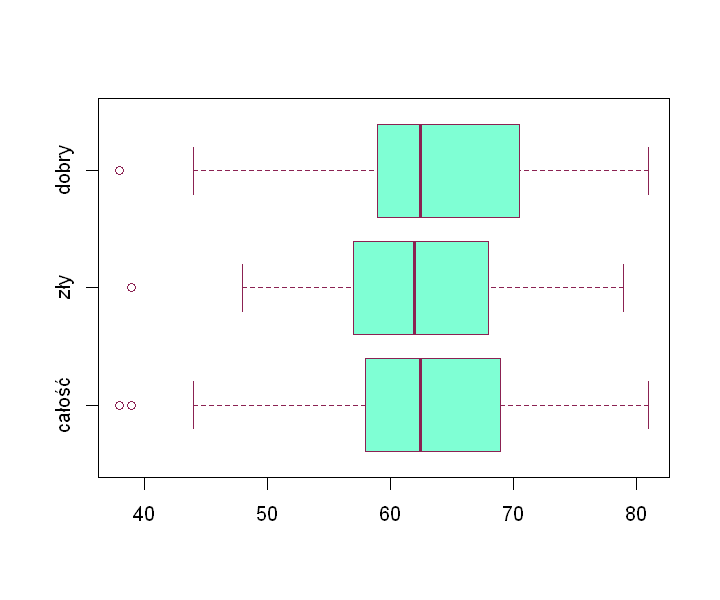

In [126]:
bad <- subset(data_set, SMOKING > 1 & ALCOHOL.CONSUMING > 1)
good <- subset(data_set, SMOKING < 2 & ALCOHOL.CONSUMING < 2)
#options(repr.plot.width = 7, repr.plot.height = 5)
#boxplot(data_set$AGE, bad$AGE, good$AGE, horizontal = TRUE, col = "aquamarine",
#    border = "violetred4", names = c("całość", "zły", "dobry"))
#length(good$AGE)
#length(bad$AGE)
#hist(bad$AGE, breaks = seq(min(bad$AGE), max(bad$AGE),
#    length.out = round(5 * log(length(bad$AGE)))))
#hist(good$AGE, breaks = seq(min(good$AGE), max(good$AGE),
 #   length.out = round(5 * log(length(good$AGE)))))

In [123]:
summary(data_set)

 GENDER       AGE           SMOKING      YELLOW_FINGERS     ANXIETY     
 F:125   Min.   :38.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 M:145   1st Qu.:58.00   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
         Median :62.50   Median :2.000   Median :2.000   Median :2.000  
         Mean   :62.95   Mean   :1.574   Mean   :1.604   Mean   :1.526  
         3rd Qu.:69.00   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
         Max.   :81.00   Max.   :2.000   Max.   :2.000   Max.   :2.000  
 PEER_PRESSURE   CHRONIC.DISEASE    FATIGUE       ALLERGY         WHEEZING    
 Min.   :1.000   Min.   :1.000   Min.   :1.0   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.0   1st Qu.:1.000   1st Qu.:1.000  
 Median :2.000   Median :2.000   Median :2.0   Median :2.000   Median :2.000  
 Mean   :1.537   Mean   :1.526   Mean   :1.7   Mean   :1.619   Mean   :1.604  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.0   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :2.000 

In [124]:
subset(data_set, AGE < 42)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN,LUNG_CANCER
239,F,38,1,2,1,1,2,2,2,2,1,2,2,1,2,YES
262,M,39,2,1,1,2,1,2,2,2,2,1,2,1,2,YES


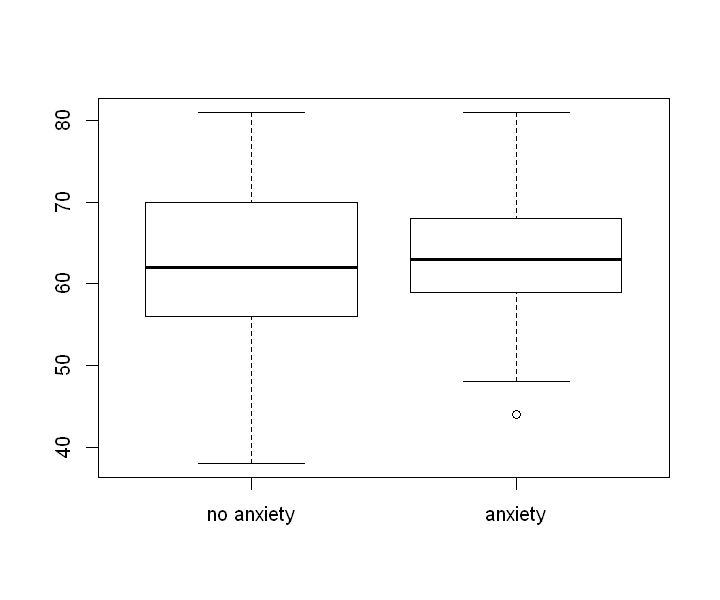

In [134]:
anx <- subset(data_set, ANXIETY > 1)
no_anx <- subset(data_set, ANXIETY < 2)
boxplot(no_anx$AGE, anx$AGE, names = c("no anxiety", "anxiety"))

In [ ]:
anx <- subset(data_set, ANXIETY > 1)
no_anx <- subset(data_set, ANXIETY < 2)
boxplot(no_anx$AGE, anx$AGE, names = c("no anxiety", "anxiety"))

In [144]:
length(women[women$SMOKING == 1,]$SMOKING)

[1] 55

In [145]:
length(men[men$SMOKING == 1,]$SMOKING)

[1] 60

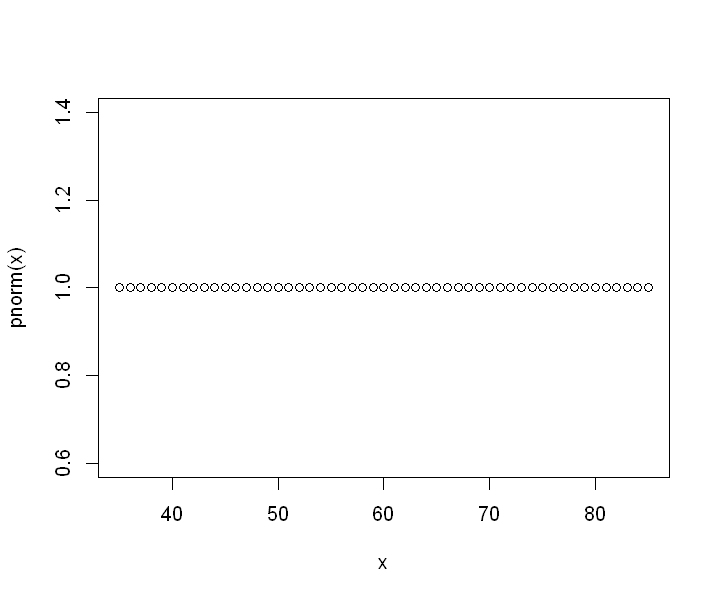

In [149]:
plot(x, pnorm(x))

In [151]:
help(pnorm)

Normal                  package:stats                  R Documentation

_T_h_e _N_o_r_m_a_l _D_i_s_t_r_i_b_u_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Density, distribution function, quantile function and random
     generation for the normal distribution with mean equal to 'mean'
     and standard deviation equal to 'sd'.

_U_s_a_g_e:

     dnorm(x, mean = 0, sd = 1, log = FALSE)
     pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
     qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
     rnorm(n, mean = 0, sd = 1)
     
_A_r_g_u_m_e_n_t_s:

    x, q: vector of quantiles.

       p: vector of probabilities.

       n: number of observations. If 'length(n) > 1', the length is
          taken to be the number required.

    mean: vector of means.

      sd: vector of standard deviations.

log, log.p: logical; if TRUE, probabilities p are given as log(p).

lower.tail: logical; if TRUE (default), probabilities are P[X <=